In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')
# Read the Mouse and Clinical trial data
clinical_df=pd.read_csv("data/clinicaltrial_data.csv")
drug_df = pd.read_csv("data/mouse_drug_data.csv")


In [2]:
# Merge the 2 dataframes clinicaltrial_data & mouse_drug_data
df = pd.merge(clinical_df, drug_df, on="Mouse ID")

In [3]:
df.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [4]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
groupbydrug_timepoint= df.groupby(["Drug","Timepoint"])
# Create a variable to store the mean of the Tumor volume
avg_tumor_vol = groupbydrug_timepoint["Tumor Volume (mm3)"].mean()
# Convert to DataFrame
drugtimetumor=pd.DataFrame({"Mean of the tumor volume":avg_tumor_vol})

# Preview DataFrame
print("Impact of drug on tumor volume over time")
drugtimetumor.reset_index().head(100)


Impact of drug on tumor volume over time


,Drug,Timepoint,Mean of the tumor volume
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [5]:
# Create a variable to store the standard error of  Tumor volume
stdErrorOfTumorVol = groupbydrug_timepoint["Tumor Volume (mm3)"].sem()
# Convert to DataFrame
drugtimetumorError = pd.DataFrame({"Standard Error on Tumor Volume (mm3)":stdErrorOfTumorVol})
# Preview DataFrame
print("Standard Error on Tumor volume")
drugtimetumorError.reset_index().head()


Standard Error on Tumor volume


,Drug,Timepoint,Standard Error on Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [6]:
# Minor Data Munging to Re-Format the Data Frames
pivtab = pd.pivot_table(drugtimetumor,values="Mean of the tumor volume", index= "Timepoint", columns="Drug")

# Preview that Reformatting worked
pivtab.head(10)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


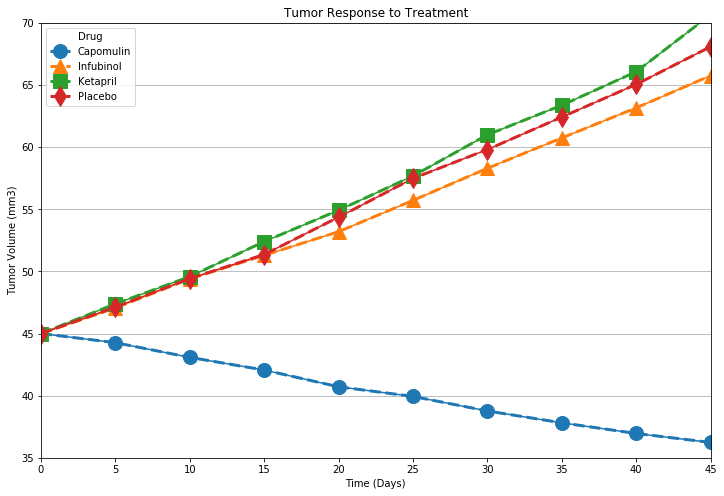

In [7]:
#  Generate the Plot (with Error Bars)
mean_df=pivtab[["Capomulin", "Infubinol", "Ketapril", "Placebo"]]
mean_errors=pivtab.index
# Plot Error Bars
ax = mean_df.plot(figsize=(12,8),  legend=False)
# Reset color cycle so that the marker match
ax.set_prop_cycle(None)
# plot the markers
mean_df.plot(figsize=(12,8), style=['o', '^', 's', 'd'], ls= "--", lw= 3,markersize= 14,  ax = ax )
plt.xlim(0,45)
plt.ylim(35,70)
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
ax.yaxis.grid()
# Save the Figure
plt.savefig("Images/tumorVol.png")


Metastatic Response to Treatment


In [8]:

# Store the Mean Met. Site Data Grouped by Drug and Timepoint
E =groupbydrug_timepoint["Metastatic Sites"].mean()

# Convert to DataFrame
drugtimetumorMet = pd.DataFrame({"Mean of the Metastatic Sites": E})

# Preview DataFrame
print("Metastatic Response to Treatment")
drugtimetumorMet.head()


Metastatic Response to Treatment


Mean of the Metastatic Sites
Drug      Timepoint                              
Capomulin 0                              0.000000
          5                              0.160000
          10                             0.320000
          15                             0.375000
          20                             0.652174

In [9]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
stdErrorWithMetSitesSem =groupbydrug_timepoint["Metastatic Sites"].sem()
# Convert to DataFrame
stdErrorWithMetSites_df= pd.DataFrame({"Standards Error of the Metastatic Sites":stdErrorWithMetSitesSem})
# Preview DataFrame
stdErrorWithMetSites_df.head()

Standards Error of the Metastatic Sites
Drug      Timepoint                                         
Capomulin 0                                         0.000000
          5                                         0.074833
          10                                        0.125433
          15                                        0.132048
          20                                        0.161621

In [10]:
# Minor Data Munging to Re-Format the Data Frames
pivtab2 = pd.pivot_table(drugtimetumorMet,values= 'Mean of the Metastatic Sites', index= "Timepoint", columns="Drug")

# Preview that Reformatting worked
pivtab2.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


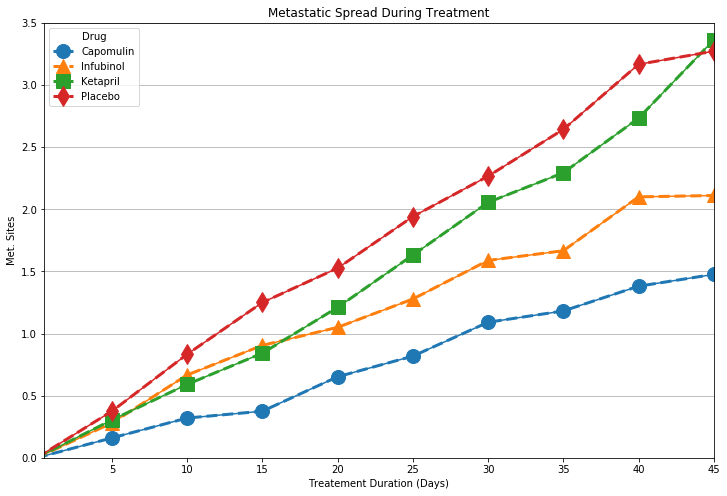

In [11]:

# Generate the Plot (with Error Bars)
mean_df2=pivtab2[["Capomulin", "Infubinol", "Ketapril", "Placebo"]]
mean_errors2=pivtab2.index

# Plot Error Bars
ax2 = mean_df2.plot(figsize=(12,8),  legend=False)
# Reset color cycle so that the marker color match
ax2.set_prop_cycle(None)
# plot the markers
mean_df2.plot(figsize=(12,8), style=['o', '^', 's', 'd'], ls = "--", lw=3,markersize= 14,  ax = ax2 )
plt.xlim(0.5,45)
plt.ylim(0,3.5)
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatement Duration (Days)")
plt.ylabel("Met. Sites")
ax2.yaxis.grid()

#ax2.errorbar(ax2, yerr=mean_errors2 , fmt= '-0')
#plt.grid(True)
# Save the Figure
plt.savefig("Images/tumorMetSites.png")
# Show the Figure

SURVIVAL RATES

In [12]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
CountOfmouse = groupbydrug_timepoint["Mouse ID"].nunique()
CountOfmouse
# Convert to DataFrame
mouseSurvival_df = pd.DataFrame({"Mouse Count":CountOfmouse})
# Preview DataFramef
mouseSurvival_df.reset_index().head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [13]:
# Minor Data Munging to Re-Format the Data Frames
pivtab3 = pd.pivot_table(mouseSurvival_df,values= 'Mouse Count', index= "Timepoint", columns="Drug")

# Preview the Data Frame
pivtab3.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17


In [14]:
# Percentage of Survival to use for the plot
percentCountOfmouse= groupbydrug_timepoint["Mouse ID"].nunique()/25*100
# Convert to DataFrame
PercentmouseSurvival_df = pd.DataFrame({"Mouse Count":percentCountOfmouse})

# Minor Data Munging to Re-Format the Data Frames
pivtab4 = pd.pivot_table(PercentmouseSurvival_df,values= 'Mouse Count', index= "Timepoint", columns="Drug")
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
#plt.show()
pivtab4.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.0,100.0,96.0,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.0,96.0,88.0,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,64.0,96.0,88.0,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,64.0,92.0,80.0,68.0


In [15]:
# Generate the Plot (Accounting for percentages)
survivalRate_df=pivtab4[["Capomulin", "Infubinol", "Ketapril", "Placebo"]]
survivalRate_df.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,100.0,100.0,100.0,100.0
5,100.0,100.0,92.0,96.0
10,100.0,84.0,88.0,96.0
15,96.0,84.0,76.0,80.0
20,92.0,80.0,76.0,76.0


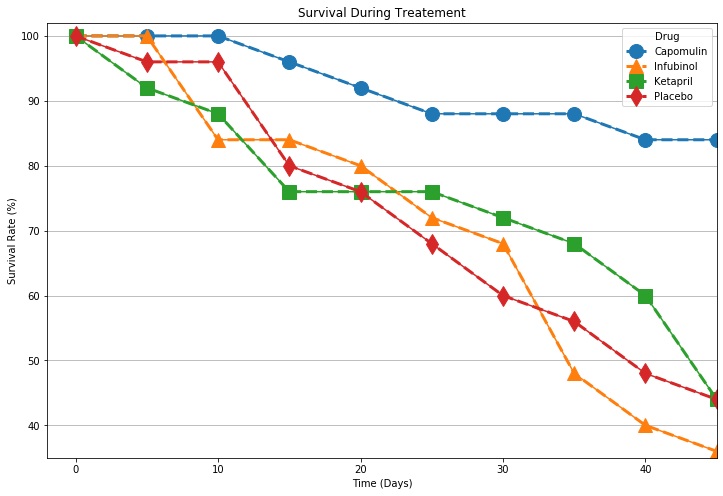

In [16]:
# Generate the Plot (Accounting for percentages)
survivalRate_df=pivtab4[["Capomulin", "Infubinol", "Ketapril", "Placebo"]]
ax3 = survivalRate_df.plot(figsize=(12,8),  legend=False)
# Reset color cycle so that the marker color match
ax3.set_prop_cycle(None)
# plot the markers
survivalRate_df.plot(figsize=(12,8), style=['o', '^', 's', 'd'], ls = "--", lw=3,markersize= 14,  ax = ax3 )
plt.xlim(-2,45)
plt.ylim(35,102)
plt.title("Survival During Treatement")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
ax3.yaxis.grid()
# Save the Figure
plt.savefig("Images/survivalduringtreatment.png")

SUMMARY BAR GRAPH

In [17]:
# Calculate the percent changes for each drug
beginTumorVol = pivtab.iloc[0]
EndingTumorVol =pivtab.iloc[-1]
percentChangeVol =((EndingTumorVol-beginTumorVol)/beginTumorVol)*100
percentChangeVol_df = pd.DataFrame({"Percent Change":percentChangeVol})
# Display the data to confirm
percentChangeVol_df

,Percent Change
Drug,
Capomulin,-19.475303
Ceftamin,42.516492
Infubinol,46.123472
Ketapril,57.028795
Naftisol,53.923347
Placebo,51.297960
Propriva,47.241175
Ramicane,-22.320900
Stelasyn,52.085134


In [18]:
# Store all Relevant Percent Changes into a Tuple

percentChangeVol_df.apply(tuple, axis=1)


Drug
Capomulin    (-19.475302667894155,)
Ceftamin      (42.516491855897414,)
Infubinol      (46.12347172785184,)
Ketapril       (57.02879468660604,)
Naftisol      (53.923347134769195,)
Placebo        (51.29796048315153,)
Propriva       (47.24117486320634,)
Ramicane      (-22.32090046276666,)
Stelasyn      (52.085134287898995,)
Zoniferol      (46.57975086509522,)
dtype: object

In [19]:
# Splice the data between passing and failing drugs
def colorPassingGreen(val):
    color = 'green' if val <0 else 'blue'
    return 'color: %s' % color
print("Drugs treatment with passing result are green")
percentChangeVol_df.style.applymap(colorPassingGreen)

Drugs treatment with passing result are green


,Percent Change
Drug,
Capomulin,-19.4753
Ceftamin,42.5165
Infubinol,46.1235
Ketapril,57.0288
Naftisol,53.9233
Placebo,51.298
Propriva,47.2412
Ramicane,-22.3209
Stelasyn,52.0851


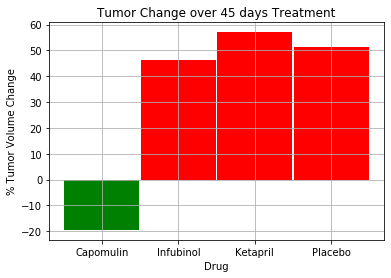

In [20]:
# Orient widths. Add labels, tick marks, etc.
percentChange_tumorVol=[-19.4753, 46.1235, 57.0288, 51.298]
drugs =["Capomulin", "Infubinol","Ketapril", "Placebo" ]
x_axis = np.arange(len(percentChange_tumorVol))
plt.bar(x_axis, percentChange_tumorVol, color =['green', 'red', 'red', 'red'], width = .98)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,drugs )
plt.xlabel("Drug")
plt.ylabel("% Tumor Volume Change")
plt.title("Tumor Change over 45 days Treatment")
plt.grid()
# Save the Figure
plt.savefig("Images/tumorchange.png")
         